In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns
import config

from twython import Twython, TwythonError
 
# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# create a Twython object by passing the necessary secret passwords
twitter = Twython(config.consumer_key, config.consumer_secret, config.access_token, config.access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(config.consumer_key, config.consumer_secret)
auth.set_access_token(config.access_token, config.access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# Target User Accounts
target_user = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@NYTimes")

# Variables for holding all sentiments
sentiments = []

# Loop through each user on 11/3/17
for user in target_user:

    counter = 1
    
    # Loop through 1 pages of 100 tweets (total 100 tweets)
    for x in range(1):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, count=100, result_type="recent")

        # Loop through all tweets
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]

            # Add each value to the appropriate array
            sentiments.append({"Media Sources": user, "Tweet Polarity": compound, "Tweets Ago": counter})
            
            # Add to counter 
            counter = counter + 1
    

In [4]:
sentiments_pd = pd.DataFrame(sentiments)
sentiments_pd["Media Sources"] = sentiments_pd["Media Sources"].map(lambda x: x.lstrip('@'))
sentiments_pd.head()
sentiments_pd.to_csv("All_TweetPolarity.csv", sep='\t')

In [5]:
sentiments_mean = sentiments_pd.groupby("Media Sources").mean()
sentiments_mean.pop("Tweets Ago")
sentiments_mean.reset_index(level=0, inplace=True)
sentiments_mean
sentiments_mean.to_csv("TweetPolarity_means.csv", sep='\t')

In [6]:
#create dictionary for colors
colors = dict(BBC="lightskyblue", CBS="green", CNN="red", FoxNews="blue", NYTimes="yellow")

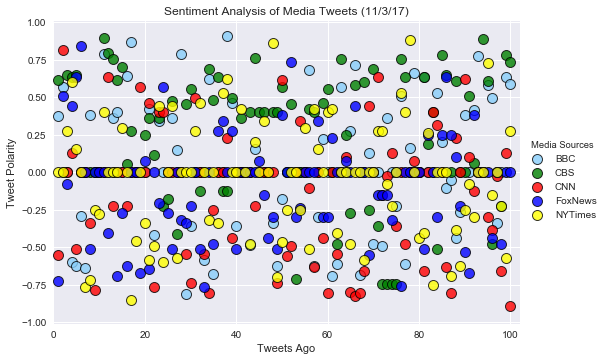

In [7]:
#create scatter plot using seaborn
sns.set()
sentiment_ago = sns.lmplot('Tweets Ago', 'Tweet Polarity', data = sentiments_pd, palette = colors, size=5, aspect = 1.5, fit_reg=False, 
                           hue="Media Sources", scatter_kws={"marker":"D","s":100, "linewidths":1, "edgecolor":"black"}, legend_out=True)
plt.title("Sentiment Analysis of Media Tweets (11/3/17)")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

plt.ylim(-1.01,1.01)
plt.xlim(0,102)
plt.show()
sentiment_ago.savefig('SentimentAnalysis.png')

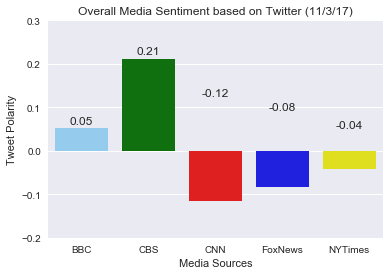

In [8]:
#create bar graph using seaborn
sns.set()
sa_mean = sns.barplot(x="Media Sources", y="Tweet Polarity", data= sentiments_mean, palette = colors)
plt.title("Overall Media Sentiment based on Twitter (11/3/17)")
plt.xlabel("Media Sources")
plt.ylabel("Tweet Polarity")
for p in sa_mean.patches:
    height = p.get_height()
    sa_mean.text(p.get_x()+p.get_width()/2., abs(height)+0.01, '{:1.2f}'.format(height), ha="center")

plt.ylim(-0.2,0.3)
plt.show()
sa_mean.figure.savefig('OverallSentimentAnalysis.png')

Three Observable Trends:
1. Tweet polarity does not correlate to increase in time.
2. Twitter accounts devoted to news (CNN, Fox News, NY Times) have a more negative tweet polarity than twitter accounts ran by news organizations (BBC, CBS).
3. Positive, Negative, and Neutral tweets occur occur simultaneously throughout media sources. 